### Load the Dataset and Initial Exploration

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/project/Brain-Stroke-Prediction/data/raw/brain_stroke_train.csv")

# Display the first few rows of the dataset
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


- After loading, check the dataset's first few rows to understand its structure.
- Check for missing values, data types, and the number of rows and columns.


### Check for Missing Values

In [3]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Visualize missing data using a bar chart
missing_data_fig = go.Figure(go.Bar(x=missing_data.index, y=missing_data.values))
missing_data_fig.update_layout(title='Missing Values in Dataset', xaxis_title='Features', yaxis_title='Count')
missing_data_fig.show()


- This will provide an overview of any features with missing values.
- Document how many missing entries are in each column, which will help guide your data cleaning.


###  Summary Statistics

In [4]:
# Summary statistics for numerical features
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


- This step gives statistical insights into numerical columns (mean, median, min, max, etc.).
- You will also spot any extreme outliers or abnormalities.


### Data Types and Categorical Features


In [5]:
# Check data types
data.dtypes

# Check for unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns].nunique()


gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

- Review the data types and the number of unique values for categorical features like gender, hypertension, and smoking_status.
- This helps understand the nature of categorical variables.


### Data Visualization – Continuous Features

In [6]:
# Plotting histograms for continuous features
fig = px.histogram(data, x="age", title="Age Distribution")
fig.show()

fig = px.histogram(data, x="bmi", title="BMI Distribution")
fig.show()


- Visualize distributions of continuous features (age, bmi, etc.) to detect skewness, outliers, or other patterns.
- Histograms help identify whether the data is normally distributed or skewed.


### Categorical Feature Visualization

In [9]:
# Plotting bar plots for categorical features with distinct colors
fig = px.bar(data, x="hypertension", title="Hypertension Distribution", color="hypertension", color_discrete_map={"0": "blue", "1": "red"})
fig.show()

fig = px.bar(data, x="smoking_status", title="Smoking Status Distribution", color="smoking_status", color_discrete_map={"never smoked": "green", "formerly smoked": "orange", "smokes": "purple"})
fig.show()


- Analyze the frequency distribution of categorical features to understand class imbalance or trends.
- Bar charts make it easier to identify dominant categories.


### Correlation Matrix

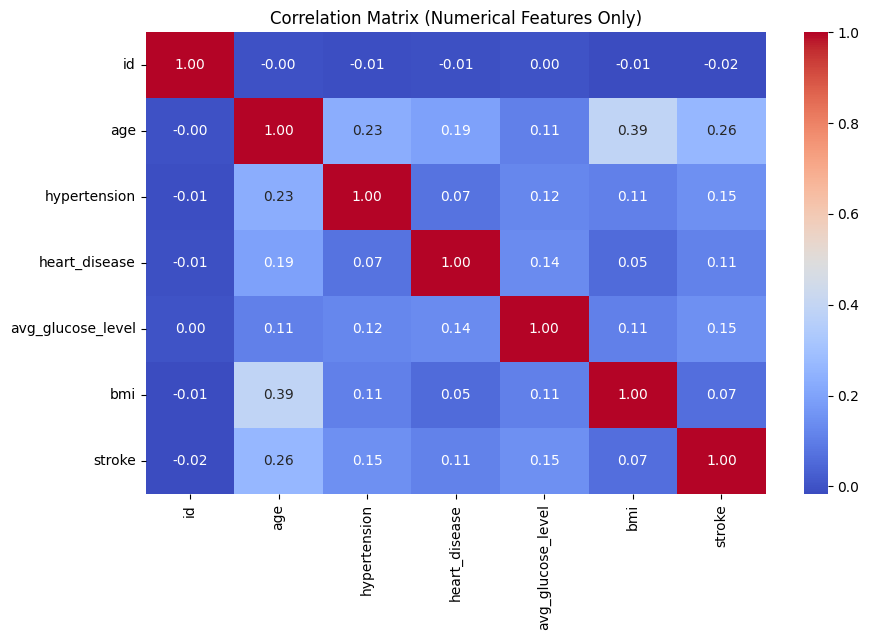

In [11]:
# Correlation heatmap for numerical features
import seaborn as sns

# Selecting only numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()


- The correlation matrix helps identify relationships between features and the target variable (stroke).
- Strong correlations can guide feature selection and inform model choice.


### Pair Plot for Feature Interactions

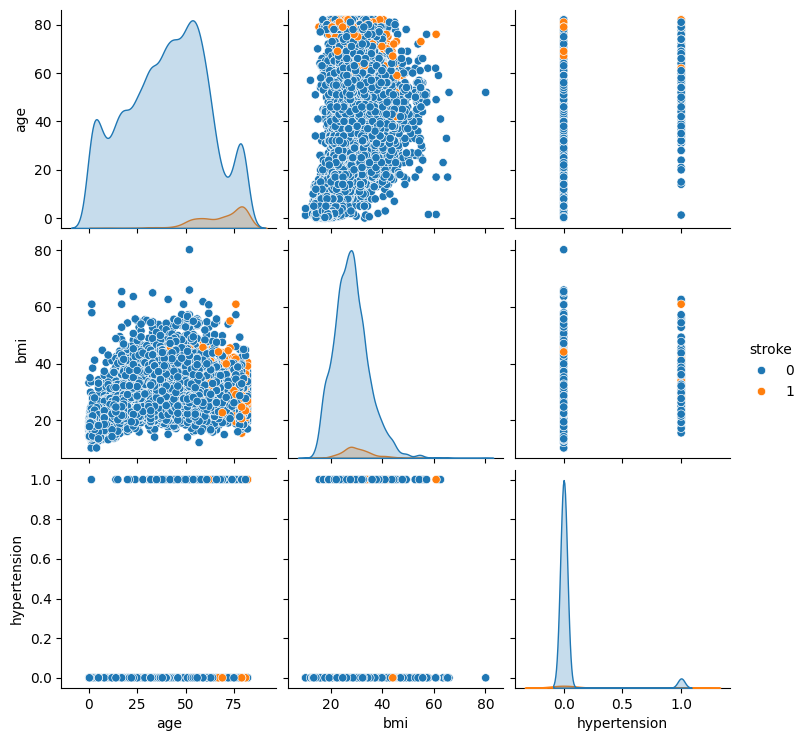

In [12]:
# Pair plot for feature interactions (for continuous features)
import seaborn as sns

sns.pairplot(data[['age', 'bmi', 'hypertension', 'stroke']], hue='stroke')
plt.show()


- Pair plots reveal relationships between continuous variables and their interactions with the target (stroke).
- It's useful for detecting patterns, clusters, and potential feature transformations.


### Handle Outliers


In [13]:
# Identify and handle outliers using boxplots for continuous features
fig = px.box(data, y="age", title="Age Distribution with Outliers")
fig.show()

fig = px.box(data, y="bmi", title="BMI Distribution with Outliers")
fig.show()


Box plots highlight potential outliers in continuous variables. These outliers could be removed or transformed to avoid skewed models.


### Target Variable Distribution

In [14]:
# Plot target variable (stroke) distribution
fig = px.pie(data, names='stroke', title='Stroke Distribution')
fig.show()


Understand the class distribution of the target variable (stroke) to check for class imbalance, which may require techniques like oversampling or downsampling.
